# Q. 1 - 10

In [1]:
import cv2
import numpy as np
import os 
try:
    os.chdir("Takehiko/Q01-10")
except:
    pass
import matplotlib.pyplot as plt
%matplotlib inline

def imshow(img):
    cv2.imshow("image", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## Q.1: Channel Swapping

### Detail: Read the image and change RGB in order of BGR.

It is possible to extract the red component of the image with the following code. **Note that in the cv2.imread () function the channel will be in order of BGR!** The variable red contains only the red component of `imori.jpg`.

```python
import cv2
img = cv2.imread("imori.jpg")
red = img[:, :, 2].copy()
```

|Input (imori.jpg)|Output (answer_1.jpg)|
|:---:|:---:|
|![](imori.jpg)|![](answer_1.jpg)|

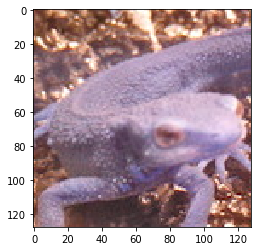

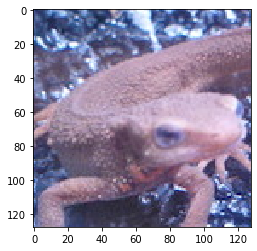

In [2]:
#1.1 
img = cv2.imread("imori.jpg") #BGR
def BGR2RGB(img):
    tmp_red = img[:,:,2].copy() #RED
    img[:,:,2] = img[:,:,0] #BLUE
    img[:,:,0] = tmp_red
    return img

plt.figure()
plt.imshow(img)
plt.figure()
plt.imshow(BGR2RGB(img))

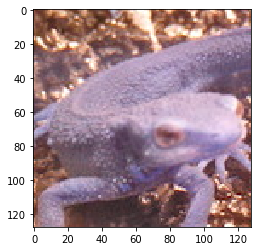

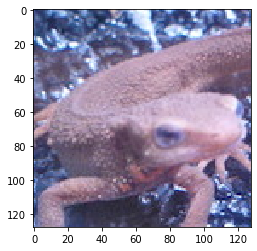

In [3]:
#1.2
img = cv2.imread("imori.jpg") #BGR
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(img)
plt.figure()
plt.imshow(img_rgb)

## Q.2: Grayscale

### Detail: Make the image grayscale. 

Grayscale is a kind of image luminance expression method and is calculated by the following formula.
$$
Y = 0.2126 R + 0.7152 G + 0.0722 B
$$


|Input (imori.jpg)|Output (answer_2.jpg)|
|:---:|:---:|
|![](imori.jpg)|![](answer_2.jpg)|

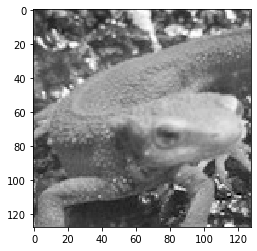

In [4]:
#2.1
img = cv2.imread("imori.jpg") #BGR
def get_luminance(img):    
    return (0.2126*img[:,:,2] + 0.7152*img[:,:,1] + 0.0722*img[:,:,0]).astype(np.uint8)
gray_img1 = get_luminance(img)
plt.imshow(gray_img1, cmap = 'gray')

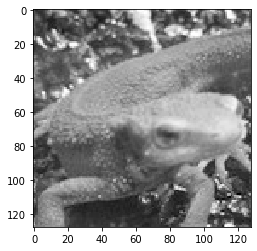

In [5]:
#2.2
img = cv2.imread("imori.jpg") #BGR
gray_img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img2, cmap = 'gray')

In [6]:
gray_img1 == gray_img2

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True,  True]])

In OpenCV, luminance is calculated below, which is defined by ITU and designed for SDTV.
$$
Y = 0.299×R+0.587×G+0.114×B
$$

But, the Q2 expression,
$$
Y=0.2126xR+0.7152xG+0.0722xB
$$
is for HDTV.

## Q.3: Binarization 

Binarize the image. Binarization is a method of expressing images as binary black and white. Here, the threshold is set to 128 in gray scale and binarized by the following equation.

```python
y = 0 if y < 128 else 255
```

|Input (imori.jpg)|Output (answer_3.jpg)|
|:---:|:---:|
|![](imori.jpg)|![](answer_3.jpg)|

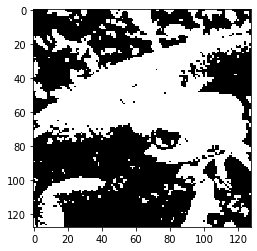

In [7]:
#3
img = cv2.imread("imori.jpg") #BGR
def get_binary(img,thresh=128):    
    Y = get_luminance(img)
    img[Y<thresh]= 0
    img[Y>=thresh]= 255
    return img
b_img = get_binary(img).astype(np.uint8)
plt.imshow(b_img, cmap = 'gray')

## Q.4: Binarization of Otsu

### Detail：Implement Otsu's binarization. 

Otsu's binarization is called a discriminant analysis method, and it is a method to automatically determine the separation threshold in binarization. This is calculated from the ratio **between** **intra-class variance** and **interclass variance** .

- Less than the threshold t is class 0, and equal or more than t is class 1.
- $w_0$, $w_1$: The ratio of the number of pixels of each class separated by the threshold t ($w_0 + w_1 = 1$ is satisfied)
- $S0^2, S1^2$ ... Distribution of pixel values of each class
- $M0, M1$ ... average value of pixel values of each class

```python
Sw^2 = w0 * S0^2 + w1 * S1^2 # Within-class variance
Sb^2 = w0 * (M0 - Mt)^2 + w1 * (M1 - Mt)^2 = w0 * w1 * (M0 - M1) ^2 # Interclass variance
St^2 = Sw^2 + Sb^2 = (const)  # Distribution of pixels of the whole image
# The degree of separation is defined by the following equation. 
X = Sb^2 / Sw^2 = Sb^2 / (St^2 - Sb^2) # Separation degree 
```

Therefore:

```python
argmax_{t} X = argmax_{t} Sb^2
```
 That is, the threshold value t that satisfies $Sb^2 =  w0 * w1 * (M0 - M1) ^2 $ may be used as the binarization threshold.

|Input (imori.jpg)|Output (th = 127) (answer_4.jpg)|
|:---:|:---:|
|![](imori.jpg)|![](answer_4.jpg)|


threshold:  127


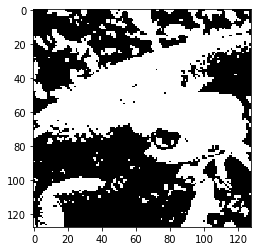

In [8]:
#4
img = cv2.imread("imori.jpg") #BGR
def get_Otsu_bibary(img):
    img = get_luminance(img)
    H, W = img.shape
    max_sigma = 0
    max_t = 0
    for t in range(1, 255):
        n0 = img[np.where(img < t)]
        w0 = np.sum(n0>0)/(H*W)
        m0 = np.mean(n0) if len(n0)>0 else 0.
        n1 = img[np.where(img >= t)]
        w1 = np.sum(n1>0)/(H*W)
        m1 = np.mean(n1) if len(n1)>0 else 0.
        sigma = w0 * w1 * ((m0-m1)**2)
        if sigma > max_sigma:
            max_sigma = sigma
            max_t = t
    print("threshold: ", max_t)
    img[img<max_t]= 0
    img[img>=max_t]= 255
    return img
otsu_img = get_Otsu_bibary(img)
plt.imshow(otsu_img, cmap = 'gray')

## Q.5: HSV Conversion

### Detail: Implement HSV conversion and flip Hue H.

HSV conversion is a method of expressing colors by Hue(色相)**、**Saturation(彩度)**、**Value(明度)** .

- Hue: 
  - Expresses the color tone from 0 to 360 degrees.
  - Indicates the kind of color such as red or blue. (0 <= H <360)
- Saturation: Color vividness. 
  - When the Saturation is low, the grayness becomes conspicuous and it becomes a dull color. (0 <= S <1)
- Value: Brightness of color. 
  - The higher the Value, the closer to white
  - The lower the Value, the closer to black. (0 <= V <1)

The RGB -> HSV conversion is defined by the following equation.

```bash
Max = max(R,G,B)
Min = min(R,G,B)
H =  { 0                            (if Min=Max)
       60 * (G-R) / (Max-Min) + 60  (if Min=B)
       60 * (B-G) / (Max-Min) + 180 (if Min=R)
       60 * (R-B) / (Max-Min) + 300 (if Min=G)
V = Max
S = Max - Min
```

HSV -> RGB conversion is defined by the following equation.

```bash
C = S

H_1 = H // 60

X = C * (1 - abs(H_1 % 2 - 1)

(R,G,B) = (V - C) * (1,1,1) + { (0, 0, 0)  (if H is undefined)
                              (C, X, 0)  (if 0 <= H_1 < 1)
                              (X, C, 0)  (if 1 <= H_1 < 2)
                              (0, C, X)  (if 2 <= H_1 < 3)
                              (0, X, C)  (if 3 <= H_1 < 4)
                              (X, 0, C)  (if 4 <= H_1 < 5)
                              (C, 0, X)  (if 5 <= H_1 < 6)}
```
In this case, invert the hue H (add 180) and display it as RGB and display the image.

|Input (imori.jpg)|Output (answer_5.jpg)|
|:---:|:---:|
|![](imori.jpg)|![](answer_5.jpg)|

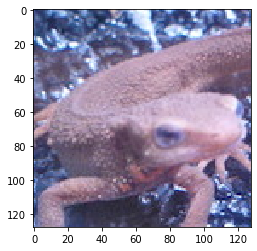

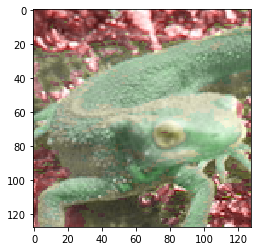

In [10]:
#5
img = cv2.imread("imori.jpg")
img = img.astype(np.float32) / 255.
_max = np.max(img, axis=2)
_min = np.min(img, axis=2)
def BGR2HSV(img):
    _max = np.max(img, axis=2)
    _min = np.min(img, axis=2)
    argmin_c = np.argmin(img, axis=2)
    H = np.zeros_like(_max)
    
    H[np.where(_max == _min)] = 0
    idx = np.where(argmin_c == 0) #B
    H[idx] = 60 * (img[:,:,1][idx] - img[:,:,2][idx]) / (_max[idx] - _min[idx]) + 60
    idx = np.where(argmin_c == 1) #G
    H[idx] = 60 * (img[:,:,2][idx] - img[:,:,0][idx]) / (_max[idx] - _min[idx]) + 300
    idx = np.where(argmin_c == 2) #R
    H[idx] = 60 * (img[:,:,0][idx] - img[:,:,1][idx]) / (_max[idx] - _min[idx]) + 180
    V = _max
    S = _max - _min
    return np.array([H,S,V])
    
def HSV2BGR(img):
    bgr_img = np.zeros(img[0].shape+(3,))
    C = img[1]
    V = img[2]
    H1 = img[0]//60
    X = C * (1-np.abs(H1%2-1))
    O = np.zeros_like(H1)
    lsts = [[O,X,C], [O,C,X], [X,C,O], [C,X,O], [C,O,X], [X,O,C]]
    for i, lst in enumerate(lsts):
        idx = np.where((i<=H1)&(H1<(i+1)))
        bgr_img[:,:,0][idx] = (V-C)[idx] + lst[0][idx]
        bgr_img[:,:,1][idx] = (V-C)[idx] + lst[1][idx]
        bgr_img[:,:,2][idx] = (V-C)[idx] + lst[2][idx]
    #bgr_img[np.where(_max == _min)] = 0
    return (bgr_img*255).astype(np.uint8)

img2 = BGR2HSV(img)
img2[0] = (img2[0] + 180) % 360 # invert hue
img2 = HSV2BGR(img2)

plt.figure()
plt.imshow(BGR2RGB(img))
plt.figure()
plt.imshow(BGR2RGB(img2))

## Q.6: Discretization of Color

### Detail:

Decrease the value of the image from 256 ^ 3 to 4 ^ 3. That is, to each of the four values R, G, B in {32, 96, 160, 224}. This is a quantization operation. For each value, it is defined as follows.

```bash
val = {  32  (0 <= val < 63)
         96  (63 <= val < 127)
        160  (127 <= val < 191)
        224  (191 <= val < 255)
```
|Input (imori.jpg)|Output (answer_6.jpg)|
|:---:|:---:|
|![](imori.jpg)|![](answer_6.jpg)|


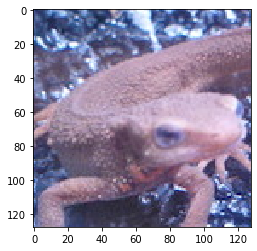

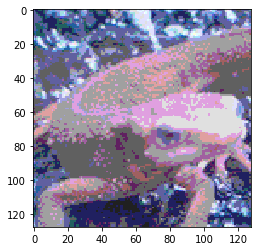

In [11]:
img = cv2.imread("imori.jpg")
def c_discretize(img, quantum=4):
    img2 = img.copy()
    band = 256//quantum - 1 
    for i in range(quantum):
        idx = np.where((band*i<=img2) & (img2<band*(i+1)))
        img2[idx] = (band+1)/2*(2*i+1)
    return img2

img2 = c_discretize(img,4)
plt.figure()
plt.imshow(BGR2RGB(img))
plt.figure()
plt.imshow(BGR2RGB(img2))

## Q.7: Average Pooling

In this case, the image is divided into grids (divide it into certain fixed-length regions), and the value in the region is filled with the average value in the region (cell). The operation of dividing the grid in this way and **obtaining** the representative value in that area is called **pooling** . These pooling operations play an important role in **CNN (Convolutional Neural Network)** .

This is defined by the following equation.

```bash
v = 1/|R| * Sum_{i in R} v_i
```

Here imori.jpg is 128x128, so divide the grid into 8x8 and average pool.

|Input (imori.jpg)|Output (answer_7.jpg)|
|:---:|:---:|
|![](imori.jpg)|![](answer_7.jpg)|


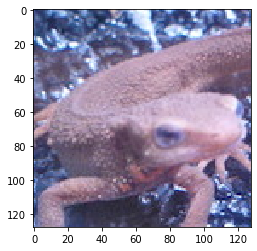

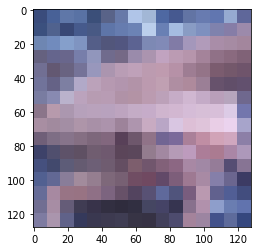

In [12]:
img = cv2.imread("imori.jpg")

def Pooling(img, k_size=8,f=np.mean):
    H, W, C = img.shape
    img2 = img.copy()
    kH = H//k_size
    kW = W//k_size
    for ky in range(kH):
        for kx in range(kW):
            for c in range(C):
                img2[k_size*ky:k_size*(ky+1),k_size*kx:k_size*(kx+1),c] = \
                    f(img2[k_size*ky:k_size*(ky+1),k_size*kx:k_size*(kx+1),c]).astype(np.int)
    return img2

img2 = Pooling(img,8,f=np.mean)
plt.figure()
plt.imshow(BGR2RGB(img))
plt.figure()
plt.imshow(BGR2RGB(img2))

## Q.8: Max Pooling

Pool here with the maximum value instead of the average value.

|Input (imori.jpg)|Output (answer_8.jpg)|
|:---:|:---:|
|![](imori.jpg)|![](answer_8.jpg)|


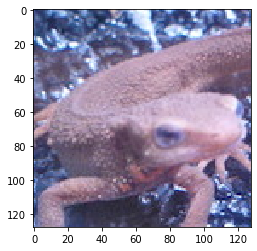

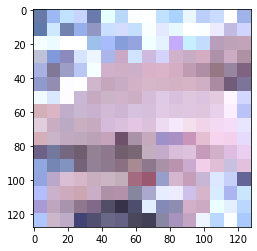

In [13]:
img = cv2.imread("imori.jpg")
img2 = Pooling(img,8,f=np.max)
plt.figure()
plt.imshow(BGR2RGB(img))
plt.figure()
plt.imshow(BGR2RGB(img2))

## Q.9: Gaussian Filter

Implement the Gaussian filter (3 × 3, standard deviation 1.3) and remove the noise of *imori_noise.jpg* .

The Gaussian filter is a type of filter that performs **smoothing** ( **smoothing** ) of an image, and it is also used for **noise removal**.

Other than this, there are median filter (Q.10), smoothing filter (Q.11), LoG filter (Q.19), and others for removing noise.

The Gaussian filter smoothes surrounding pixels of the pixel of interest by weighting by Gaussian distribution and is defined by the following equation. Such weights are called **kernels** and **filters** .

However, as it is impossible to filter the edges of the image as it is, pixels where the pixels are missing are filled with zeros. This is called **0 padding** . And weights are normalized. (sum g = 1)

```bash
Weight g(x,y,s) = 1/ (s*sqrt(2 * pi)) * exp( - (x^2 + y^2) / (2*s^2))
by the standard deviation s = 1.3 8 neighborhood Gaussian filter is 
            1 2 1
K =  1/16 [ 2 4 2 ]
            1 2 1
```

|Input (imori_noise.jpg)|Output (answer_9.jpg)|
|:---:|:---:|
|![](imori_noise.jpg)|![](answer_9.jpg)|


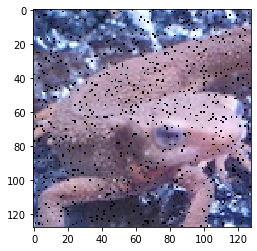

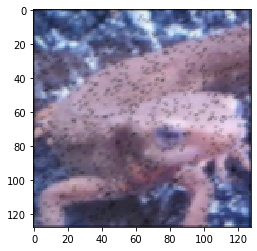

In [14]:
img = cv2.imread("imori_noise.jpg")

gauss = lambda s: lambda x,y: 1/(s*np.sqrt(2 * np.pi)) * np.exp( - (x**2 + y**2) / (2*s**2))

def Gaussian_Mat(gauss, k_size=3):
    K = np.zeros((k_size,k_size))
    h = k_size//2
    for x in range(-h, k_size-h):
        for y in range(-h, k_size-h):
            K[y+h,x+h] = gauss(x,y)
    K /= K.sum()
    K_func = lambda mat: K*mat
    return K_func

def Filter(img, K_func, k_size=3,pad_size=1):
    H, W, C = img.shape
    img2 = np.zeros((H+pad_size*2, W+pad_size*2, 3))
    img2[pad_size:H+pad_size, pad_size:W+pad_size] = img.copy()
    
    for y in range(H):
        for x in range(W):
            for c in range(C):
                img2[pad_size+y,pad_size+x, c] = np.sum(K_func(img2[y:y+k_size,x:x+k_size,c]))
    return img2[pad_size:H+pad_size, pad_size:W+pad_size].astype(np.uint8)
    
img2 = Filter(img, K_func=Gaussian_Mat(gauss(1.3),3), k_size=3, pad_size=1)
plt.figure()
plt.imshow(BGR2RGB(img))
plt.figure()
plt.imshow(BGR2RGB(img2))

## Q.10: Median Filter

Implement the median filter (3x3) and remove the noise of *imori_noise.jpg* .

The median filter is a type of filter that performs smoothing of an image.

This is a filter that outputs a median value (median value) within the 3 × 3 region of the target pixel. Zero pad this too.

|Input (imori_noise.jpg)|Output (answer_10.jpg)|
|:---:|:---:|
|![](imori_noise.jpg)|![](answer_10.jpg)|


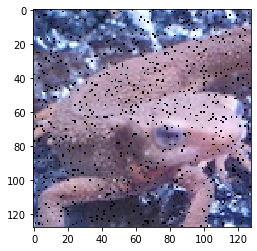

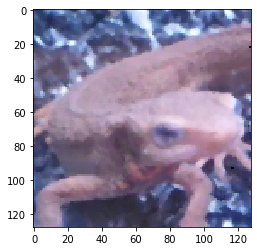

In [15]:
img = cv2.imread("imori_noise.jpg")
median2D = lambda mat: np.median(mat.reshape(-1,1))
img2 = Filter(img, K_func=median2D, k_size=3, pad_size=0)

plt.figure()
plt.imshow(BGR2RGB(img))
plt.figure()
plt.imshow(BGR2RGB(img2))